In [1]:
import pandas as pd
import numpy as np
import gc
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i, t in tqdm(enumerate(types)):
        if 'int' in str(t):
            if df[cols[i]].min() >= np.iinfo(np.int8).min and df[cols[i]].max() <= np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() >= np.iinfo(np.int16).min and df[cols[i]].max() <= np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() >= np.iinfo(np.int32).min and df[cols[i]].max() <= np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
                
        elif 'float' in str(t):
            if df[cols[i]].min() >= np.finfo(np.float16).min and df[cols[i]].max() <= np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() >= np.finfo(np.float32).min and df[cols[i]].max() <= np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)  
            elif df[cols[i]].min() >= np.finfo(np.float64).min and df[cols[i]].max() <= np.finfo(np.float64).max:
                df[cols[i]] = df[cols[i]].astype(np.float64) 
                
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df['date'], format='%Y-%m-%d')
            else:
                 df[cols[i]] = df[cols[i]].astype('category')
    return df

In [2]:
df = pd.read_csv("observations.csv")
gc.collect()
df.head()

KeyboardInterrupt: 

In [5]:
df = downcast(df)
df.head()

8it [00:14,  1.80s/it]


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,8302-2,Body Height,82.7,cm,numeric
1,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,29463-7,Body Weight,11.5,kg,numeric
3,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,77606-2,Weight-for-length Per age and sex,47.0,%,numeric
4,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,9843-4,Head Occipital-frontal circumference,46.9,cm,numeric


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16219969 entries, 0 to 16219968
Data columns (total 8 columns):
 #   Column       Dtype   
---  ------       -----   
 0   DATE         category
 1   PATIENT      category
 2   ENCOUNTER    category
 3   CODE         category
 4   DESCRIPTION  category
 5   VALUE        category
 6   UNITS        category
 7   TYPE         category
dtypes: category(8)
memory usage: 299.0 MB


In [11]:
top_desc = df["DESCRIPTION"].value_counts()[:10]
top_desc

Systolic Blood Pressure                             470679
Diastolic Blood Pressure                            470679
Respiratory rate                                    456354
Heart rate                                          456354
Body Weight                                         456354
Oxygen saturation in Arterial blood                 422998
Body temperature                                    348419
Glomerular filtration rate/1.73 sq M.predicted      254418
Protein [Mass/volume] in Serum or Plasma            254187
Bilirubin.total [Mass/volume] in Serum or Plasma    254187
Name: DESCRIPTION, dtype: int64

In [12]:
filt1 = df['DESCRIPTION'] == top_desc.index[0]
for desc in top_desc.index[1:]:
    filt2 = df['DESCRIPTION'] == desc
    filt1 = filt1 | filt2
filt1

0           False
1           False
2            True
3           False
4           False
            ...  
16219964    False
16219965    False
16219966    False
16219967    False
16219968    False
Name: DESCRIPTION, Length: 16219969, dtype: bool

In [13]:
df = df[filt1]
df

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
2,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,29463-7,Body Weight,11.5,kg,numeric
5,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,8462-4,Diastolic Blood Pressure,76.0,mm[Hg],numeric
6,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,8480-6,Systolic Blood Pressure,107.0,mm[Hg],numeric
7,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,8867-4,Heart rate,68.0,/min,numeric
8,2019-08-01,1ff7f10f-a204-4bb1-aa72-dd763fa99482,52051c30-c6c3-45fe-b5da-a790f1680e91,9279-1,Respiratory rate,13.0,/min,numeric
...,...,...,...,...,...,...,...,...
16219941,2020-03-09,f8d85cff-037c-4313-9448-14ac57d586a8,f2cadc10-2d46-42a8-80db-2893c700b50b,8480-6,Systolic Blood Pressure,138.0,mm[Hg],numeric
16219942,2020-03-09,f8d85cff-037c-4313-9448-14ac57d586a8,f2cadc10-2d46-42a8-80db-2893c700b50b,29463-7,Body Weight,86.5,kg,numeric
16219954,2020-03-14,f8d85cff-037c-4313-9448-14ac57d586a8,5dd561ed-9b82-4ea5-b4a1-14f8dc3fcf77,33914-3,Glomerular filtration rate/1.73 sq M.predicted,85.9,mL/min,numeric
16219955,2020-03-14,f8d85cff-037c-4313-9448-14ac57d586a8,5dd561ed-9b82-4ea5-b4a1-14f8dc3fcf77,2885-2,Protein [Mass/volume] in Serum or Plasma,79.7,g/dL,numeric


In [14]:
df_new = df[['ENCOUNTER', 'DESCRIPTION', 'VALUE']]
df_new = df_new.drop_duplicates(subset=['ENCOUNTER', 'DESCRIPTION']).reset_index().drop(columns=['index'])
df_new

,ENCOUNTER,DESCRIPTION,VALUE
0,52051c30-c6c3-45fe-b5da-a790f1680e91,Body Weight,11.5
1,52051c30-c6c3-45fe-b5da-a790f1680e91,Diastolic Blood Pressure,76.0
2,52051c30-c6c3-45fe-b5da-a790f1680e91,Systolic Blood Pressure,107.0
3,52051c30-c6c3-45fe-b5da-a790f1680e91,Heart rate,68.0
4,52051c30-c6c3-45fe-b5da-a790f1680e91,Respiratory rate,13.0
...,...,...,...
1743454,f2cadc10-2d46-42a8-80db-2893c700b50b,Systolic Blood Pressure,138.0
1743455,f2cadc10-2d46-42a8-80db-2893c700b50b,Body Weight,86.5
1743456,5dd561ed-9b82-4ea5-b4a1-14f8dc3fcf77,Glomerular filtration rate/1.73 sq M.predicted,85.9
1743457,5dd561ed-9b82-4ea5-b4a1-14f8dc3fcf77,Protein [Mass/volume] in Serum or Plasma,79.7


In [15]:
df_obs = df_new.pivot(index='ENCOUNTER', columns='DESCRIPTION', values='VALUE')
df_obs.columns.name = None 
df_obs

,Body Weight,Diastolic Blood Pressure,Systolic Blood Pressure,Heart rate,Respiratory rate,Body temperature,Oxygen saturation in Arterial blood,Glomerular filtration rate/1.73 sq M.predicted,Protein [Mass/volume] in Serum or Plasma,Bilirubin.total [Mass/volume] in Serum or Plasma
ENCOUNTER,,,,,,,,,,
52051c30-c6c3-45fe-b5da-a790f1680e91,11.5,76.0,107.0,68.0,13.0,NaN,NaN,NaN,NaN,NaN
20032279-0deb-41f9-bea4-93710396eb95,12.3,78.0,100.0,75.0,13.0,NaN,NaN,NaN,NaN,NaN
60584c6a-e26b-4176-a660-86ad84c7ceca,12.4,75.0,130.0,164.2,32.9,39.7,86.2,NaN,NaN,NaN
26f579ef-1dc8-4899-b8fc-13f98eaeee55,14.4,77.0,130.0,85.0,15.0,NaN,NaN,NaN,NaN,NaN
723060b3-7be8-4d12-8e1e-04f9da2c52d5,15.5,75.0,112.0,90.0,14.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
040fc55c-7f66-44ef-99ea-7fc5b5062d8d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9,65.7,0.3
05eedff4-3826-498a-80c9-04b4b5843ddd,NaN,NaN,NaN,NaN,NaN,NaN,76.2,NaN,NaN,NaN
b2df236d-1a09-4b7f-8282-f9c574515ee2,85.0,75.0,134.0,71.0,14.0,NaN,NaN,NaN,NaN,NaN


In [23]:
df_obs.to_csv('Obs.csv')

# =================================

In [24]:
df_conditions = pd.read_csv('conditions.csv')
df_obs = pd.read_csv('Obs.csv')
df_conditions = downcast(df_conditions)
df_obs = downcast(df_obs)
df_conditions = df_conditions.dropna()
df_conditions.isnull().sum()

6it [00:02,  2.73it/s]
11it [00:00, 13.88it/s]


START          0
STOP           0
PATIENT        0
ENCOUNTER      0
CODE           0
DESCRIPTION    0
dtype: int64

In [25]:
df_conditions_sympt = df_conditions[(df_conditions['DESCRIPTION'].str.contains('finding'))]
df_conditions_sympt

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
2,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,386661006,Fever (finding)
6,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,49727002,Cough (finding)
7,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,248595008,Sputum finding (finding)
8,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,267060006,Diarrhea symptom (finding)
9,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,386661006,Fever (finding)
...,...,...,...,...,...,...
1143853,2020-03-04,2020-04-08,8cf835a7-f161-4fe9-a559-350c97a3450e,72314c29-60f7-4eb3-b2cc-902ba571c99e,267036007,Dyspnea (finding)
1143854,2020-03-04,2020-04-08,8cf835a7-f161-4fe9-a559-350c97a3450e,72314c29-60f7-4eb3-b2cc-902ba571c99e,56018004,Wheezing (finding)
1143855,2020-03-04,2020-04-08,8cf835a7-f161-4fe9-a559-350c97a3450e,72314c29-60f7-4eb3-b2cc-902ba571c99e,386661006,Fever (finding)
1143896,2020-03-09,2020-04-05,f8d85cff-037c-4313-9448-14ac57d586a8,f2cadc10-2d46-42a8-80db-2893c700b50b,248595008,Sputum finding (finding)


In [26]:
df_conditions_temp = df_conditions_sympt[['ENCOUNTER', 'DESCRIPTION']]
df_conditions_temp

,ENCOUNTER,DESCRIPTION
2,60584c6a-e26b-4176-a660-86ad84c7ceca,Fever (finding)
6,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Cough (finding)
7,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Sputum finding (finding)
8,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Diarrhea symptom (finding)
9,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Fever (finding)
...,...,...
1143853,72314c29-60f7-4eb3-b2cc-902ba571c99e,Dyspnea (finding)
1143854,72314c29-60f7-4eb3-b2cc-902ba571c99e,Wheezing (finding)
1143855,72314c29-60f7-4eb3-b2cc-902ba571c99e,Fever (finding)
1143896,f2cadc10-2d46-42a8-80db-2893c700b50b,Sputum finding (finding)


In [27]:
symptoms = df_conditions_sympt['DESCRIPTION'].value_counts()[:12].index
symptoms

CategoricalIndex(['Fever (finding)', 'Cough (finding)',
                  'Loss of taste (finding)', 'Fatigue (finding)',
                  'Sputum finding (finding)', 'Dyspnea (finding)',
                  'Wheezing (finding)', 'Respiratory distress (finding)',
                  'Muscle pain (finding)', 'Joint pain (finding)',
                  'Sore throat symptom (finding)', 'Headache (finding)'],
                 categories=['Acquired coagulation disorder (disorder)', 'Acute Cholecystitis', 'Acute allergic reaction', 'Acute bacterial sinusitis (disorder)', 'Acute bronchitis (disorder)', 'Acute deep venous thrombosis (disorder)', 'Acute pulmonary embolism (disorder)', 'Acute respiratory distress syndrome (disorder)', ...], ordered=False, dtype='category')

In [28]:
def filt_top(df, column, top_list):
    filt1 = df[column] == top_list[0]
    for desc in tqdm(top_list[1:]):
        filt2 = df[column] == desc
        filt1 = filt1 | filt2
    return filt1

In [29]:
df_conditions_sympt = df_conditions_sympt[filt_top(df_conditions_sympt, 'DESCRIPTION', symptoms)]
df_conditions_sympt

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2206.05it/s]


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
2,2020-03-01,2020-03-30,1ff7f10f-a204-4bb1-aa72-dd763fa99482,60584c6a-e26b-4176-a660-86ad84c7ceca,386661006,Fever (finding)
6,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,49727002,Cough (finding)
7,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,248595008,Sputum finding (finding)
9,2020-03-13,2020-04-14,9bcf6ed5-d808-44af-98a0-7d78a29ede72,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,386661006,Fever (finding)
13,2020-03-10,2020-04-02,5163c501-353c-4a82-b863-a3f1df2d6cf1,f26c8d54-0e02-402b-9e98-13be78607b6b,248595008,Sputum finding (finding)
...,...,...,...,...,...,...
1143853,2020-03-04,2020-04-08,8cf835a7-f161-4fe9-a559-350c97a3450e,72314c29-60f7-4eb3-b2cc-902ba571c99e,267036007,Dyspnea (finding)
1143854,2020-03-04,2020-04-08,8cf835a7-f161-4fe9-a559-350c97a3450e,72314c29-60f7-4eb3-b2cc-902ba571c99e,56018004,Wheezing (finding)
1143855,2020-03-04,2020-04-08,8cf835a7-f161-4fe9-a559-350c97a3450e,72314c29-60f7-4eb3-b2cc-902ba571c99e,386661006,Fever (finding)
1143896,2020-03-09,2020-04-05,f8d85cff-037c-4313-9448-14ac57d586a8,f2cadc10-2d46-42a8-80db-2893c700b50b,248595008,Sputum finding (finding)


In [30]:
df_conditions_temp = df_conditions_temp[filt_top(df_conditions_temp, 'DESCRIPTION', symptoms)]
df_conditions_temp

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 2588.21it/s]


,ENCOUNTER,DESCRIPTION
2,60584c6a-e26b-4176-a660-86ad84c7ceca,Fever (finding)
6,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Cough (finding)
7,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Sputum finding (finding)
9,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Fever (finding)
13,f26c8d54-0e02-402b-9e98-13be78607b6b,Sputum finding (finding)
...,...,...
1143853,72314c29-60f7-4eb3-b2cc-902ba571c99e,Dyspnea (finding)
1143854,72314c29-60f7-4eb3-b2cc-902ba571c99e,Wheezing (finding)
1143855,72314c29-60f7-4eb3-b2cc-902ba571c99e,Fever (finding)
1143896,f2cadc10-2d46-42a8-80db-2893c700b50b,Sputum finding (finding)


In [31]:
symptoms = symptoms.str[:-10]
symptoms

Index(['Fever', 'Cough', 'Loss of taste', 'Fatigue', 'Sputum finding',
       'Dyspnea', 'Wheezing', 'Respiratory distress', 'Muscle pain',
       'Joint pain', 'Sore throat symptom', 'Headache'],
      dtype='object')

In [32]:
symp_data = {symp:[0 for _ in range(len(df_conditions_temp['ENCOUNTER'].unique()))] for symp in symptoms}
symp_data['ENCOUNTER'] = df_conditions_temp['ENCOUNTER'].unique()
symp_data = pd.DataFrame(symp_data)
symp_data

,Fever,Cough,Loss of taste,Fatigue,Sputum finding,Dyspnea,Wheezing,Respiratory distress,Muscle pain,Joint pain,Sore throat symptom,Headache,ENCOUNTER
0,0,0,0,0,0,0,0,0,0,0,0,0,60584c6a-e26b-4176-a660-86ad84c7ceca
1,0,0,0,0,0,0,0,0,0,0,0,0,a78e78d9-33bb-40bc-9e42-e47ff7e910cc
2,0,0,0,0,0,0,0,0,0,0,0,0,f26c8d54-0e02-402b-9e98-13be78607b6b
3,0,0,0,0,0,0,0,0,0,0,0,0,12a6479c-c830-44a4-a6e6-1db0d5b0d815
4,0,0,0,0,0,0,0,0,0,0,0,0,8851313a-7276-49a2-ad6d-c672b3f6ebb5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98965,0,0,0,0,0,0,0,0,0,0,0,0,43d9d971-2625-46ac-8378-6a07ae2fc586
98966,0,0,0,0,0,0,0,0,0,0,0,0,d888cc7f-1217-4e02-8ef3-b82de698896d
98967,0,0,0,0,0,0,0,0,0,0,0,0,ccd36d91-4c90-411d-bd3d-0163d24684e4
98968,0,0,0,0,0,0,0,0,0,0,0,0,72314c29-60f7-4eb3-b2cc-902ba571c99e


In [33]:
df_conditions_temp.loc[:, 'DESCRIPTION'] = df_conditions_temp['DESCRIPTION'].str[:-10]
df_conditions_temp = df_conditions_temp.reset_index().drop(columns=['index'])
df_conditions_temp

C:\Users\Arjun\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,ENCOUNTER,DESCRIPTION
0,60584c6a-e26b-4176-a660-86ad84c7ceca,Fever
1,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Cough
2,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Sputum finding
3,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,Fever
4,f26c8d54-0e02-402b-9e98-13be78607b6b,Sputum finding
...,...,...
331836,72314c29-60f7-4eb3-b2cc-902ba571c99e,Dyspnea
331837,72314c29-60f7-4eb3-b2cc-902ba571c99e,Wheezing
331838,72314c29-60f7-4eb3-b2cc-902ba571c99e,Fever
331839,f2cadc10-2d46-42a8-80db-2893c700b50b,Sputum finding


In [34]:
for enc in tqdm(df_conditions_temp['ENCOUNTER'].unique()):
    filt = df_conditions_temp['ENCOUNTER'] == enc
    symps = df_conditions_temp[filt]['DESCRIPTION'].tolist()
    symp_data.loc[symp_data['ENCOUNTER'] == enc, symps] = 1
symp_data

100%|███████████████████████████████████████████████████████████████████████████| 98970/98970 [04:22<00:00, 376.47it/s]


,Fever,Cough,Loss of taste,Fatigue,Sputum finding,Dyspnea,Wheezing,Respiratory distress,Muscle pain,Joint pain,Sore throat symptom,Headache,ENCOUNTER
0,1,0,0,0,0,0,0,0,0,0,0,0,60584c6a-e26b-4176-a660-86ad84c7ceca
1,1,1,0,0,1,0,0,0,0,0,0,0,a78e78d9-33bb-40bc-9e42-e47ff7e910cc
2,1,0,1,0,1,0,0,0,0,0,0,0,f26c8d54-0e02-402b-9e98-13be78607b6b
3,1,1,0,0,0,0,0,0,0,0,0,0,12a6479c-c830-44a4-a6e6-1db0d5b0d815
4,1,0,0,0,0,1,1,0,0,0,0,0,8851313a-7276-49a2-ad6d-c672b3f6ebb5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98965,1,1,0,0,0,0,0,0,0,0,0,0,43d9d971-2625-46ac-8378-6a07ae2fc586
98966,0,0,0,0,0,0,0,1,0,0,0,0,d888cc7f-1217-4e02-8ef3-b82de698896d
98967,1,1,1,0,0,0,0,0,0,0,0,0,ccd36d91-4c90-411d-bd3d-0163d24684e4
98968,1,1,0,1,0,1,1,0,0,0,0,0,72314c29-60f7-4eb3-b2cc-902ba571c99e


In [35]:
columns = ['ENCOUNTER', 'Body Weight', 'Diastolic Blood Pressure', 'Heart rate', 'Respiratory rate', 'Systolic Blood Pressure']

In [36]:
df_train = pd.merge(df_obs[columns].dropna(), symp_data, on='ENCOUNTER', how='left').dropna().reset_index().drop(columns=['index'])
df_train

,ENCOUNTER,Body Weight,Diastolic Blood Pressure,Heart rate,Respiratory rate,Systolic Blood Pressure,Fever,Cough,Loss of taste,Fatigue,Sputum finding,Dyspnea,Wheezing,Respiratory distress,Muscle pain,Joint pain,Sore throat symptom,Headache
0,60584c6a-e26b-4176-a660-86ad84c7ceca,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,15.796875,79.0,172.37500,20.000000,118.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f26c8d54-0e02-402b-9e98-13be78607b6b,51.687500,74.0,149.12500,22.500000,117.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12a6479c-c830-44a4-a6e6-1db0d5b0d815,85.687500,87.0,72.18750,19.593750,123.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8851313a-7276-49a2-ad6d-c672b3f6ebb5,8.296875,77.0,94.87500,25.500000,129.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98965,43d9d971-2625-46ac-8378-6a07ae2fc586,84.625000,71.0,94.37500,17.796875,124.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98966,d888cc7f-1217-4e02-8ef3-b82de698896d,84.625000,72.0,125.62500,14.898438,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
98967,ccd36d91-4c90-411d-bd3d-0163d24684e4,91.125000,75.0,119.12500,18.406250,122.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98968,72314c29-60f7-4eb3-b2cc-902ba571c99e,85.125000,98.0,50.90625,20.703125,186.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_careplan = pd.read_csv("careplans.csv")
df_careplan = df_careplan[df_careplan['REASONDESCRIPTION'].notnull()]

In [38]:
df_conditions.DESCRIPTION.value_counts()

Suspected COVID-19                                 91038
COVID-19                                           84615
Fever (finding)                                    75108
Cough (finding)                                    57228
Loss of taste (finding)                            42825
                                                   ...  
History of appendectomy                                0
History of cardiac arrest (situation)                  0
History of disarticulation at wrist (situation)        0
History of lower limb amputation (situation)           0
Impacted molars                                        0
Name: DESCRIPTION, Length: 191, dtype: int64

In [39]:
df_careplan.REASONDESCRIPTION.value_counts()[:20]

Suspected COVID-19                               91039
COVID-19                                         70536
Prediabetes                                      35819
Hypertension                                     32560
Acute bronchitis (disorder)                      15993
Hyperlipidemia                                   15362
Normal pregnancy                                 14418
Chronic congestive heart failure (disorder)       6773
Diabetes                                          6049
Osteoarthritis of knee                            6030
Drug overdose                                     5417
Childhood asthma                                  5390
Alzheimer's disease (disorder)                    4297
Neoplasm of prostate                              3579
Whiplash injury to neck                           3419
Localized  primary osteoarthritis of the hand     2571
Osteoarthritis of hip                             2203
Pulmonary emphysema (disorder)                    2128
Chronic ob

In [41]:
temp_care_cols = ['Prediabetes', 'Diabetes', 'Hypertension', 'Acute bronchitis (disorder)']
temp_cols = ['Viral sinusitis (disorder)', 'Pneumonia (disorder)']
temp_cols = ['Suspected COVID-19', 'COVID-19'] + temp_care_cols + temp_cols

In [47]:
df_conditions = df_conditions[['ENCOUNTER', 'DESCRIPTION']].astype(np.str)

In [48]:
df_conditions.loc[-filt_top(df_conditions, 'DESCRIPTION', temp_cols), 'DESCRIPTION'] = 'Others'
df_conditions

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 34.15it/s]


,ENCOUNTER,DESCRIPTION
0,d317dacb-d801-4136-be7d-440094f7ae83,Others
1,759cfd9c-b40b-45df-a5b2-fca418027a6a,Others
2,60584c6a-e26b-4176-a660-86ad84c7ceca,Others
3,60584c6a-e26b-4176-a660-86ad84c7ceca,Suspected COVID-19
4,60584c6a-e26b-4176-a660-86ad84c7ceca,COVID-19
...,...,...
1143895,b8b0fbbe-0eb6-4ba5-8b88-4018ae86a934,Viral sinusitis (disorder)
1143896,f2cadc10-2d46-42a8-80db-2893c700b50b,Others
1143897,f2cadc10-2d46-42a8-80db-2893c700b50b,Others
1143898,f2cadc10-2d46-42a8-80db-2893c700b50b,Suspected COVID-19


In [49]:
final_temp = pd.DataFrame(df_conditions[['ENCOUNTER', 'DESCRIPTION']]).rename(
    columns={0:'ENCOUNTER', 1:'DESCRIPTION'}
).drop_duplicates()
final_temp

,ENCOUNTER,DESCRIPTION
0,d317dacb-d801-4136-be7d-440094f7ae83,Others
1,759cfd9c-b40b-45df-a5b2-fca418027a6a,Others
2,60584c6a-e26b-4176-a660-86ad84c7ceca,Others
3,60584c6a-e26b-4176-a660-86ad84c7ceca,Suspected COVID-19
4,60584c6a-e26b-4176-a660-86ad84c7ceca,COVID-19
...,...,...
1143885,6eab4269-b711-4aa0-8ea6-6183d26b74c6,Others
1143895,b8b0fbbe-0eb6-4ba5-8b88-4018ae86a934,Viral sinusitis (disorder)
1143896,f2cadc10-2d46-42a8-80db-2893c700b50b,Others
1143898,f2cadc10-2d46-42a8-80db-2893c700b50b,Suspected COVID-19


In [50]:
final_temp.DESCRIPTION.value_counts()

Others                         137432
Suspected COVID-19              91038
COVID-19                        84615
Viral sinusitis (disorder)      15613
Pneumonia (disorder)            14654
Acute bronchitis (disorder)      6795
Name: DESCRIPTION, dtype: int64

In [51]:
final_temp.to_csv('final_temp.csv')

# ================================

In [69]:
final_temp = pd.read_csv("final_temp.csv").iloc[:, 1:]
final_temp

,ENCOUNTER,DESCRIPTION
0,d317dacb-d801-4136-be7d-440094f7ae83,Others
1,759cfd9c-b40b-45df-a5b2-fca418027a6a,Others
2,60584c6a-e26b-4176-a660-86ad84c7ceca,Others
3,60584c6a-e26b-4176-a660-86ad84c7ceca,Suspected COVID-19
4,60584c6a-e26b-4176-a660-86ad84c7ceca,COVID-19
...,...,...
350142,6eab4269-b711-4aa0-8ea6-6183d26b74c6,Others
350143,b8b0fbbe-0eb6-4ba5-8b88-4018ae86a934,Viral sinusitis (disorder)
350144,f2cadc10-2d46-42a8-80db-2893c700b50b,Others
350145,f2cadc10-2d46-42a8-80db-2893c700b50b,Suspected COVID-19


In [70]:
final_temp.loc[-final_temp['DESCRIPTION'].str.contains('COVID'), 'DESCRIPTION'] = 0
final_temp.loc[final_temp['DESCRIPTION']!= 0, 'DESCRIPTION'] = 1
final_temp

,ENCOUNTER,DESCRIPTION
0,d317dacb-d801-4136-be7d-440094f7ae83,0
1,759cfd9c-b40b-45df-a5b2-fca418027a6a,0
2,60584c6a-e26b-4176-a660-86ad84c7ceca,0
3,60584c6a-e26b-4176-a660-86ad84c7ceca,1
4,60584c6a-e26b-4176-a660-86ad84c7ceca,1
...,...,...
350142,6eab4269-b711-4aa0-8ea6-6183d26b74c6,0
350143,b8b0fbbe-0eb6-4ba5-8b88-4018ae86a934,0
350144,f2cadc10-2d46-42a8-80db-2893c700b50b,0
350145,f2cadc10-2d46-42a8-80db-2893c700b50b,1


In [74]:
df_train = pd.merge(df_train, final_temp, on='ENCOUNTER', how='left')

In [75]:
df_train

,ENCOUNTER,Body Weight,Diastolic Blood Pressure,Heart rate,Respiratory rate,Systolic Blood Pressure,Fever,Cough,Loss of taste,Fatigue,Sputum finding,Dyspnea,Wheezing,Respiratory distress,Muscle pain,Joint pain,Sore throat symptom,Headache,DESCRIPTION
0,60584c6a-e26b-4176-a660-86ad84c7ceca,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,60584c6a-e26b-4176-a660-86ad84c7ceca,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,60584c6a-e26b-4176-a660-86ad84c7ceca,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,15.796875,79.0,172.37500,20.000000,118.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,a78e78d9-33bb-40bc-9e42-e47ff7e910cc,15.796875,79.0,172.37500,20.000000,118.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281803,72314c29-60f7-4eb3-b2cc-902ba571c99e,85.125000,98.0,50.90625,20.703125,186.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
281804,72314c29-60f7-4eb3-b2cc-902ba571c99e,85.125000,98.0,50.90625,20.703125,186.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
281805,f2cadc10-2d46-42a8-80db-2893c700b50b,86.500000,79.0,164.50000,31.593750,138.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
281806,f2cadc10-2d46-42a8-80db-2893c700b50b,86.500000,79.0,164.50000,31.593750,138.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [76]:
df_train.to_csv('df_train.csv')

# =====================================

In [49]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

### Downcasting the preprocessed dataset

In [4]:
df_train = downcast(pd.read_csv('df_train.csv')).iloc[:, 2:]
df_train.head()

20it [00:00, 52.63it/s]


,Body Weight,Diastolic Blood Pressure,Heart rate,Respiratory rate,Systolic Blood Pressure,Fever,Cough,Loss of taste,Fatigue,Sputum finding,Dyspnea,Wheezing,Respiratory distress,Muscle pain,Joint pain,Sore throat symptom,Headache,DESCRIPTION
0,12.398438,75.0,164.250,32.90625,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,12.398438,75.0,164.250,32.90625,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,12.398438,75.0,164.250,32.90625,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,15.796875,79.0,172.375,20.00000,118.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,15.796875,79.0,172.375,20.00000,118.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281808 entries, 0 to 281807
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Body Weight               281808 non-null  float16
 1   Diastolic Blood Pressure  281808 non-null  float16
 2   Heart rate                281808 non-null  float16
 3   Respiratory rate          281808 non-null  float16
 4   Systolic Blood Pressure   281808 non-null  float16
 5   Fever                     281808 non-null  float16
 6   Cough                     281808 non-null  float16
 7   Loss of taste             281808 non-null  float16
 8   Fatigue                   281808 non-null  float16
 9   Sputum finding            281808 non-null  float16
 10  Dyspnea                   281808 non-null  float16
 11  Wheezing                  281808 non-null  float16
 12  Respiratory distress      281808 non-null  float16
 13  Muscle pain               281808 non-null  f

### Generating population for the evolutionary algorithm

In [6]:
population = df_train.iloc[:, :]
X_val, y_val = df_train.iloc[-20000:-10000, :-1], df_train.iloc[-20000:-10000, -1]
X_test, y_test = df_train.iloc[-10000:, :-1], df_train.iloc[-10000:, -1]
population

,Body Weight,Diastolic Blood Pressure,Heart rate,Respiratory rate,Systolic Blood Pressure,Fever,Cough,Loss of taste,Fatigue,Sputum finding,Dyspnea,Wheezing,Respiratory distress,Muscle pain,Joint pain,Sore throat symptom,Headache,DESCRIPTION
0,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,15.796875,79.0,172.37500,20.000000,118.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,15.796875,79.0,172.37500,20.000000,118.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281803,85.125000,98.0,50.90625,20.703125,186.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
281804,85.125000,98.0,50.90625,20.703125,186.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
281805,86.500000,79.0,164.50000,31.593750,138.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
281806,86.500000,79.0,164.50000,31.593750,138.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Adding random and empty features for the population

In [7]:
for i in range(10):
    population.loc[:, f'Empty_feature{i}']= 0
    population.loc[:, f'Random_feature{i}']= np.random.random(len(population),)
population

,Body Weight,Diastolic Blood Pressure,Heart rate,Respiratory rate,Systolic Blood Pressure,Fever,Cough,Loss of taste,Fatigue,Sputum finding,...,Empty_feature5,Random_feature5,Empty_feature6,Random_feature6,Empty_feature7,Random_feature7,Empty_feature8,Random_feature8,Empty_feature9,Random_feature9
0,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,...,0,0.860314,0,0.171646,0,0.498294,0,0.009322,0,0.612713
1,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,...,0,0.832175,0,0.765335,0,0.912700,0,0.279611,0,0.097475
2,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,...,0,0.142782,0,0.616626,0,0.048436,0,0.815764,0,0.862120
3,15.796875,79.0,172.37500,20.000000,118.0,1.0,1.0,0.0,0.0,1.0,...,0,0.263887,0,0.038257,0,0.237208,0,0.341093,0,0.927714
4,15.796875,79.0,172.37500,20.000000,118.0,1.0,1.0,0.0,0.0,1.0,...,0,0.941113,0,0.075838,0,0.193051,0,0.919427,0,0.847683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281803,85.125000,98.0,50.90625,20.703125,186.0,1.0,1.0,0.0,1.0,0.0,...,0,0.743966,0,0.515003,0,0.864627,0,0.232042,0,0.259086
281804,85.125000,98.0,50.90625,20.703125,186.0,1.0,1.0,0.0,1.0,0.0,...,0,0.764380,0,0.317626,0,0.371323,0,0.243908,0,0.447808
281805,86.500000,79.0,164.50000,31.593750,138.0,1.0,0.0,0.0,0.0,1.0,...,0,0.897361,0,0.479797,0,0.000123,0,0.379407,0,0.578890
281806,86.500000,79.0,164.50000,31.593750,138.0,1.0,0.0,0.0,0.0,1.0,...,0,0.934803,0,0.198877,0,0.187742,0,0.230046,0,0.979960


In [8]:
temp_population = population[population.columns[:17].tolist() + population.columns[18:].tolist()]
temp_population['DESCRIPTION'] =  population['DESCRIPTION']
population = temp_population
population

,Body Weight,Diastolic Blood Pressure,Heart rate,Respiratory rate,Systolic Blood Pressure,Fever,Cough,Loss of taste,Fatigue,Sputum finding,...,Random_feature5,Empty_feature6,Random_feature6,Empty_feature7,Random_feature7,Empty_feature8,Random_feature8,Empty_feature9,Random_feature9,DESCRIPTION
0,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,...,0.860314,0,0.171646,0,0.498294,0,0.009322,0,0.612713,0
1,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,...,0.832175,0,0.765335,0,0.912700,0,0.279611,0,0.097475,1
2,12.398438,75.0,164.25000,32.906250,130.0,1.0,0.0,0.0,0.0,0.0,...,0.142782,0,0.616626,0,0.048436,0,0.815764,0,0.862120,1
3,15.796875,79.0,172.37500,20.000000,118.0,1.0,1.0,0.0,0.0,1.0,...,0.263887,0,0.038257,0,0.237208,0,0.341093,0,0.927714,0
4,15.796875,79.0,172.37500,20.000000,118.0,1.0,1.0,0.0,0.0,1.0,...,0.941113,0,0.075838,0,0.193051,0,0.919427,0,0.847683,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281803,85.125000,98.0,50.90625,20.703125,186.0,1.0,1.0,0.0,1.0,0.0,...,0.743966,0,0.515003,0,0.864627,0,0.232042,0,0.259086,1
281804,85.125000,98.0,50.90625,20.703125,186.0,1.0,1.0,0.0,1.0,0.0,...,0.764380,0,0.317626,0,0.371323,0,0.243908,0,0.447808,1
281805,86.500000,79.0,164.50000,31.593750,138.0,1.0,0.0,0.0,0.0,1.0,...,0.897361,0,0.479797,0,0.000123,0,0.379407,0,0.578890,0
281806,86.500000,79.0,164.50000,31.593750,138.0,1.0,0.0,0.0,0.0,1.0,...,0.934803,0,0.198877,0,0.187742,0,0.230046,0,0.979960,1


### Creating samples of random columns from the population 

In [9]:
samples = []
for _ in range(10):
    cols = population.columns[:-1].tolist()
    rand_cols = []
    for _ in range(10):
        random_index = np.random.randint(len(cols))
        rand_cols.append(cols[random_index])
        cols.pop(random_index)
    samples.append(population[rand_cols])
    samples[-1]['DESCRIPTION'] = population['DESCRIPTION']
samples[0]

,Random_feature0,Sore throat symptom,Empty_feature4,Random_feature3,Empty_feature1,Systolic Blood Pressure,Empty_feature7,Loss of taste,Random_feature4,Random_feature6,DESCRIPTION
0,0.141289,0.0,0,0.130628,0,130.0,0,0.0,0.001884,0.171646,0
1,0.013458,0.0,0,0.171659,0,130.0,0,0.0,0.691068,0.765335,1
2,0.769736,0.0,0,0.137681,0,130.0,0,0.0,0.910462,0.616626,1
3,0.182140,0.0,0,0.705167,0,118.0,0,0.0,0.240286,0.038257,0
4,0.449593,0.0,0,0.842820,0,118.0,0,0.0,0.794108,0.075838,1
...,...,...,...,...,...,...,...,...,...,...,...
281803,0.364547,0.0,0,0.392502,0,186.0,0,0.0,0.568131,0.515003,1
281804,0.010398,0.0,0,0.273508,0,186.0,0,0.0,0.396853,0.317626,1
281805,0.635609,0.0,0,0.756270,0,138.0,0,0.0,0.912572,0.479797,0
281806,0.544661,0.0,0,0.136534,0,138.0,0,0.0,0.507723,0.198877,1


### Fitness function inputs the sample into a lightGBM model and grades the sample by checking the f1 score of the prediction

In [10]:
def fitness_function(sample, get_imp = False):
    X_train, y_train = sample.iloc[:-20000, :-1], sample.iloc[:-20000, -1:] 
    X_val, y_val = sample.iloc[-20000:-10000, :][X_train.columns], sample.iloc[-20000:-10000, :][y_train.columns[0]]
    X_test, y_test = sample.iloc[-10000:, :][X_train.columns], sample.iloc[-10000:, :][y_train.columns[0]]
    model = LGBMClassifier(
#         n_estimators=1000,
#         learning_rate = 0.2,
#         subsample = 0.8,
#         colsample_bytree = 0.8,
#         max_depth = 8,
#         num_leaves = np.square(8),
#         min_child_weight=200,
    )
    model.fit(
        X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose = 0, early_stopping_rounds=20
    )
    if get_imp:
        return model
    return f1_score(y_test, model.predict(X_test))

In [11]:
def mutation(sample):
    count = np.random.randint(0, 3)
    random_cols = sample.iloc[:, sample.columns.str.contains('Random')]
    for col in random_cols:
        if count == 0:
            break
        sample[col] *= [np.random.random()*2 for _ in range(len(sample))]
        count -= 1
    return sample

In [12]:
def cross_sampling(sample1, sample2):
    target = sample1[sample1.columns[-1]]
    target_name = sample1.columns[-1]
    
    for _ in range(np.random.randint(2, 8)):
        i, j = 0, 0
        while i == j:
            i = np.random.choice(sample1.columns[:-1])
            j = np.random.choice(sample2.columns[:-1])
#         print(i, j, end='---> ')
        sample1[j] = sample2[j]
        sample2[i] = sample1[i]
        
        sample1 = sample1.drop(columns=[i, target_name])
        sample2 = sample2.drop(columns=[j, target_name])
        
        sample1[target_name], sample2[target_name] = target, target
#         print(sample1.columns[-2:], end = '; ')
#         print(sample2.columns[-2:])
#         break

    return mutation(sample1), mutation(sample2)

In [13]:
def genetic_cycle(samples):
    sample_score = {0: 0}
    
    for i in (range(len(samples))):
        sample_score[i] = fitness_function(samples[i])
    selected_samples = [samples[i[0]] for i in sorted(sample_score.items(), key=lambda kv:(kv[1], kv[0]))[-5:]]
    best_score = sorted(sample_score.items(), key=lambda kv:(kv[1], kv[0]))[-1][1]
    print(f'Best Score: {sorted(sample_score.items(), key=lambda kv:(kv[1], kv[0]))[-1]}')
    
    children = []
    for i in range(len(selected_samples)):
        j = np.random.choice([j for j in range(len(selected_samples)) if j != i])
        children += cross(selected_samples[i].copy(), selected_samples[j].copy())
    children += selected_samples[-3:]
        
    return children, best_score

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Best Score: (5, 0.7992776402916193)


 10%|████████▎                                                                          | 1/10 [00:08<01:13,  8.21s/it]

Best Score: (9, 0.7994382398180967)


 20%|████████████████▌                                                                  | 2/10 [00:17<01:08,  8.59s/it]

Best Score: (12, 0.7994382398180967)


 30%|████████████████████████▉                                                          | 3/10 [00:28<01:04,  9.28s/it]

Best Score: (8, 0.7994917067950776)


 40%|█████████████████████████████████▏                                                 | 4/10 [00:38<00:57,  9.51s/it]

Best Score: (12, 0.7994917067950776)


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:48<00:48,  9.66s/it]

Best Score: (12, 0.7994917067950776)


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:59<00:39,  9.89s/it]

Best Score: (12, 0.7994917067950776)


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:09<00:29,  9.91s/it]

Best Score: (12, 0.7994917067950776)


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [01:19<00:20, 10.07s/it]

Best Score: (12, 0.7994917067950776)


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:30<00:10, 10.30s/it]

Best Score: (12, 0.7994917067950776)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:40<00:00, 10.01s/it]


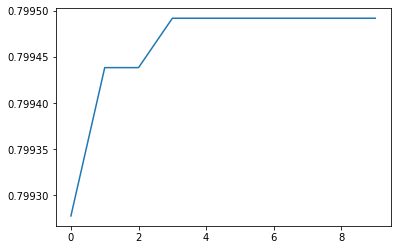

In [14]:
history = []
for _ in tqdm(range(10)):
    samples, hist = genetic_cycle(samples)
    history.append(hist)
plt.plot(history)
plt.show()

### The above plot shows the increase of the top sample of it's generation

In [16]:
sample_score = {0:0}
for i in (range(len(samples))):
    sample_score[i] = fitness_function(samples[i])
selected_samples = [samples[i[0]] for i in sorted(sample_score.items(), key=lambda kv:(kv[1], kv[0]))[-5:]]
best_score = sorted(sample_score.items(), key=lambda kv:(kv[1], kv[0]))[-1][1]
print(f'Best Score: {sorted(sample_score.items(), key=lambda kv:(kv[1], kv[0]))[-1]}')

Best Score: (12, 0.7994917067950776)


In [17]:
sorted(sample_score.items(), key=lambda kv:(kv[1], kv[0]))

[(9, 0.7482005382737685),
 (1, 0.7482942097026604),
 (4, 0.7603187136601823),
 (0, 0.7994382398180967),
 (2, 0.7994382398180967),
 (3, 0.7994382398180967),
 (5, 0.7994382398180967),
 (7, 0.7994382398180967),
 (8, 0.7994382398180967),
 (6, 0.7994917067950776),
 (10, 0.7994917067950776),
 (11, 0.7994917067950776),
 (12, 0.7994917067950776)]

#### Hence the 12th, 11th, 10th and 6th sample in the last generation (10) has the top fitness_score

In [19]:
samples[12].head()

,Random_feature1,Empty_feature0,Joint pain,Empty_feature9,Fever,Respiratory distress,Random_feature3,DESCRIPTION
0,0.831633,0,0.0,0,1.0,0.0,0.130628,0
1,0.023043,0,0.0,0,1.0,0.0,0.171659,1
2,0.000880,0,0.0,0,1.0,0.0,0.137681,1
3,1.015853,0,0.0,0,1.0,0.0,0.705167,0
4,0.537376,0,0.0,0,1.0,0.0,0.842820,1
...,...,...,...,...,...,...,...,...
281803,0.106720,0,0.0,0,1.0,0.0,0.392502,1
281804,0.378164,0,0.0,0,1.0,0.0,0.273508,1
281805,0.463559,0,0.0,0,1.0,0.0,0.756270,0
281806,0.027701,0,0.0,0,1.0,0.0,0.136534,1


#### Feature Importance

In [56]:
imps= fitness_function(samples[12], True).feature_importances_
counter = 0
for cols, imp in zip(samples[12].columns, fitness_function(samples[12], True).feature_importances_):
    print(f"{cols}: {(imp*100)/sum(imps)}")
    imps[counter] = (imp*100)/sum(imps)
    counter+=1

Random_feature1: 51.96666666666667
Empty_feature0: 0.0
Joint pain: 8.646112600536194
Empty_feature9: 0.0
Fever: 9.044493070751276
Respiratory distress: 6.60828025477707
Random_feature3: 93.72349448685327


<AxesSubplot:>

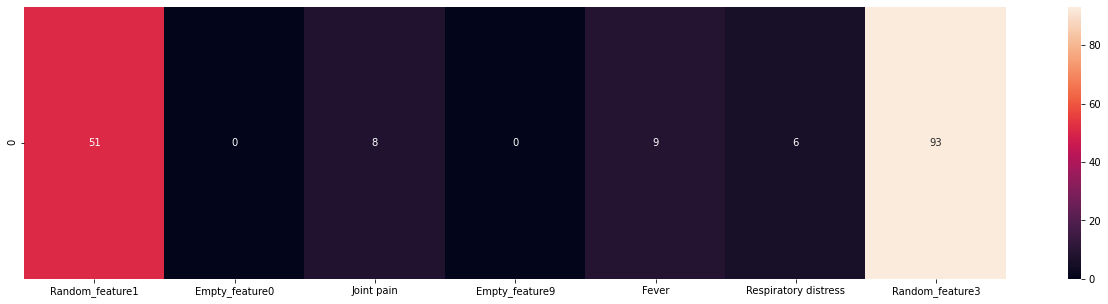

In [58]:
col_list = samples[12].columns[:-1]
plt.figure(figsize=(22,5))
sns.heatmap(imps[np.newaxis,:], xticklabels=col_list, annot = True)